<a href="https://colab.research.google.com/github/DipuBala/ML_AI_Lab/blob/main/Dipankar_2017831047_CNN_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Access

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/Ml_Lab/CNN_dataset.zip"

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dir_path = '/content/CNN_dataset/'

train_split = 0.75
val_split = 0.1
test_split = 0.15

images = []
labels = []

class_names = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [7]:
for i, class_name in enumerate(class_names):
  class_path = os.path.join(dir_path, class_name)
  for image_name in os.listdir(class_path):
      image_path = os.path.join(class_path, image_name)
      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, (64, 64))
      images.append(image)
      labels.append(i)

In [8]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_split/(train_split-val_split),
    stratify=y_train, random_state=42)

In [10]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [12]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
x_train = x_train.reshape(-1,64, 64,1) #Reshape for CNN 
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(35961, 64, 64, 1)

In [15]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
420/420 [==============================] - 19s 16ms/step - loss: 0.1128 - accuracy: 0.9651 - val_loss: 0.0135 - val_accuracy: 0.9967
Epoch 2/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0259 - val_accuracy: 0.9965
Epoch 3/10
420/420 [==============================] - 7s 16ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0651 - val_accuracy: 0.9936
Epoch 4/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 5/10
420/420 [==============================] - 7s 16ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0158 - val_accuracy: 0.9958
Epoch 6/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0606 - val_accuracy: 0.9753
Epoch 7/10
420/420 [==============================] - 6s 15ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0317 - val_accuracy: 0.993

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9987999796867371


In [17]:
predictions = model.predict(x_test)
predictions[0]

235/235 [==============================] - 1s 2ms/step


array([2.2694946e-15, 1.0000000e+00, 5.6384467e-11, 1.6013910e-08,
       3.3741872e-18], dtype=float32)

In [18]:
np.argmax(predictions[0])

1

In [21]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(7500, 64, 64)

In [23]:
import matplotlib.pyplot as plt

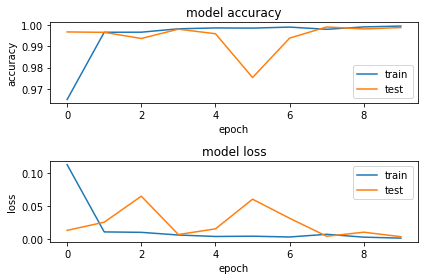

In [24]:
import os
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()